<a href="https://colab.research.google.com/github/dulaltech101/Deep-learning-Capstone/blob/main/Deep_Learning_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project Malaria Detection**

**By Durga P. Dulal**

### **Context**

**Malaria - The Forgetton Epidemic and Deep Learning :**

Do you know that Malaria is far deadlier in Africa than the coronavirus? Malaria is a parasitic disease that claims the lives of over 400,000 people each year, and the majority of the victims are children in Africa. Malaria is caused by Plasmodium parasites, which are spread to humans via the bites of infected female Anopheles mosquitos. According to UNICEF, in 2019, there were 229 million malaria cases worldwide, resulting in 409,000 deaths. Sixty-seven percent (274,000) of these deaths occurred in children under the age of five.

 “Lab technicians should process no more than 25 slides each day, but a lack of qualified workers lead some to process four times as many”, says Martha Nakaya - an experienced lab technologist of 11 years who works at Kiruddu General Hospital in Lake Victoria, Uganda

But this is changing. Uganda’s first Artificial Intelligence (AI) lab, at Makerere University, has developed a way to diagnose blood samples using a cell phone. An automated system can help with the early and accurate detection of Malaria with higher accuracy than manual classification. It is also faster, cheaper, and saves hundreds of thousands of human lives.                 

It would therefore be highly beneﬁcial to propose a method that performs malaria detection using Deep Learning Algorithms.




### **Objective**

Patients' health situations are classified by disease diagnosis, which aids in making proper treatment options. Microscopy and computer vision improvements have made it possible to diagnose diseases more quickly. Deep learning has dramatically changed the face of computer vision, beating humans in tasks such as object recognition. As we know, CNN is used for image recognition tasks because its architecture considers the spatial structure of the images. 
The objectives of the Capstone project are as follows: 
1.	Design an efficient computer vision model for automatic detection of malaria cells images. 
2.	The model should include identity where the image of a red blood cell is that one infected with Malaria or not, and classify the same as parasitized or uninfected, respectively. 


### **About the dataset**

There are a total of 24,958 train and 2,600 test images (colored) with an equal number of parasitized
and uninfected instances, where:

- The **parasitized** cells contain the Plasmodium parasite
- The **uninfected** cells are free of the Plasmodium parasites but could contain other impurities

### **Loading the libraries**

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# For working with images
import zipfile
import os
from PIL import Image
import numpy as np

import cv2
import glob
from __future__ import absolute_import, division, print_function

# For data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# For CNN model creation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")


Let's check the version of the Tensor flow

In [ ]:
print(tf.__version__)

2.6.0


### **Load the dataset:**

In [ ]:
#Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip' 

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
#Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

#Size of image so that each image has the same size
SIZE = 64

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (64,64)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

Let's check the number of images in the training and testing data.

- As know that the Python interpreter has several built-in functions and types that are always available. And len() is a built-in function in python. You can use the len() to get the length of the given string, array, list, tuple, dictionary, etc. Let's use len() to the number of images in the training and testing data.

In [ ]:
#printing the numbers of the images in the training and testing dataset

len(train_images), len(test_labels)

(24958, 2600)

- There are 24958 images in the training data and 2600 images in the testing data.

###**Visualizing the Parasitized and Uninfected cell - Malaria**

- Visualizing the random 16 malaria cell images from the train dataset, that include the infected (parasitized) & uninfected

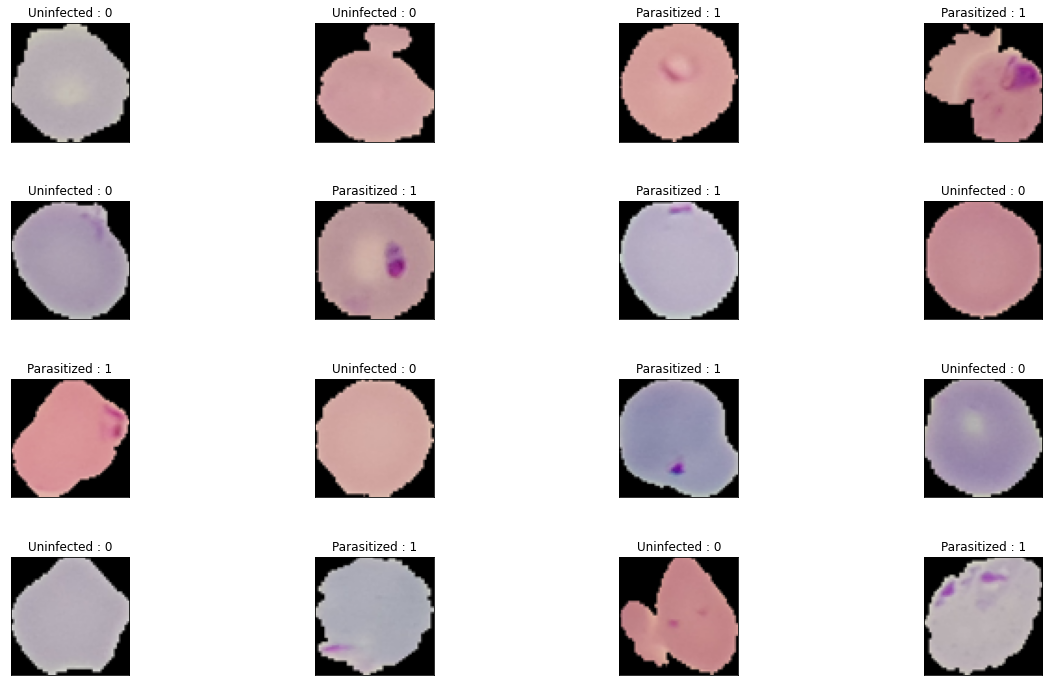

In [ ]:
#visualizing the random 16 malaria cell images, that include the infected (parasitized) & uninfected
 
plt.figure(1 , figsize = (20 , 12))
n = 0 
for i in range(16):
    n += 1 
    r = np.random.randint(0 , train_images.shape[0] , 1)
    plt.subplot(4 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(train_images[r[0]]/255.)
    plt.title('{} : {}'.format('Parasitized' if train_labels[r[0]] == 1 else 'Uninfected' ,
                               train_labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])   

**Observations:**
- Class 0 represent uninfected healthy cell image, whereas class 1 represent infected malaria cell, i.e., parasite 
- We can notice from the above plot that most of the parasitized stand out compared to the uninfected cells. We can notice a dot mark on the parasitized (infected) malaria cell images. There are subtle differences between malaria (parasitized) and healthy cell images.


### **Data Preparation :**

Let's check the number of images in training labels (0 - uninfected, 1 - parasitized)

In [ ]:
print('Parasitized image count in train data:', len(train_labels[train_labels == 1]))
print('Uninfected image count in train data:', len(train_labels[train_labels == 0]))

Parasitized image count in train data: 12479
Uninfected image count in train data: 12479


 Checking the number of axes of the tensor:
 - Vector has five entries and so is called a 5-dimensional vector. A 5D vector has only one axis and has five dimensions along its axis, whereas a 5D tensor has five axes (and may have any number of dimensions along each axis). We can display the number of axes of a Numpy tensor via the ndim attribute

In [ ]:
#checking the number of axes of the tensor

print('Number of axes of tensor: Train image:', train_images.ndim)
print('Number of axes of tensor: Test image:',test_images.ndim)

Number of axes of tensor: Train image: 4
Number of axes of tensor: Test image: 4


Let's display the fourth digit

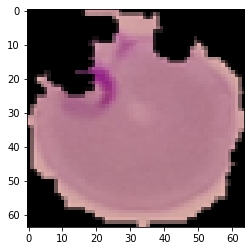

In [ ]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

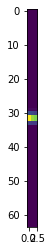

In [ ]:
#visualise the centroid image (train dataset)

mean_img = np.median(train_images, axis = 0)[0]
plt.imshow(mean_img)

Let's check the datatype: 

In [ ]:
#checking the dataype of the images

print('Datatype:')
print('Train:', train_images.dtype)
print('Test: ', test_images.dtype)

Datatype:
Train: uint8
Test:  uint8


In [ ]:
# Shape of the images and the first image

print("Shape:", train_images[0].shape)
print()
print("First image:\n", train_images[0])

Shape: (64, 64, 3)

First image:
 [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


Let's print the new shapes of the train and the test set

In [ ]:
# New shape 

print('Training set:', train_images.shape, train_labels.shape)
print('Testing set:', test_images.shape, test_labels.shape)

Training set: (24958, 64, 64, 3) (24958,)
Testing set: (2600, 64, 64, 3) (2600,)


As we know **image pixel values range from 0-255**, let's dividing all the pixel values by 255 to standardize all the images to have values between 0-1.



In [ ]:
#Normalizing inputs from 0-255 to 0-1

train_images = train_images / 255
test_images = test_images/ 255

In [ ]:
#Shape of the train images and the first image

print('Image size:', train_images[0].shape)
print('Maximum value of train image: ', np.max(train_images))

Image size: (64, 64, 3)
Maximum value of train image:  1.0


**One-hot encoded**
- Malaria detection is a binary classification. The output layer should have two neurons that will provide us with the probabilities of the input image belonging to those two classes. Hence, let's **create a one-hot encoded representation** for the target classes.

In [ ]:
#Write the function and appropriate variable name to one-hot encode the output

train_labels = to_categorical(train_labels)
test_labels =  to_categorical(test_labels)

#test labels
test_labels


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

   Let's visualize the relationship between the network, layers, loss function, and optimizer.

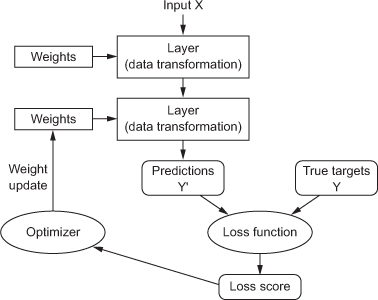

A convolutional neural network (CNN) is a neural network that has one or more convolutional layers and are used mainly for image processing, classification, segmentation and also for other auto correlated data. Each convolutional layer contains a series of filters known as convolutional kernels. The filter is a matrix of integers that are used on a subset of the input pixel values, the same size as the kernel.

CNN extracts the feature of the image and converts it into a lower dimension without losing its characteristics. And in CNNs, instead of having an input vector, the input tensor has new dimensions (height, width, channels). There are five different layers in CNN, which are as follows: 

- Input layer
- Convo layer (Convo + ReLU)
- Pooling layer
- Fully connected(FC) layer
- Softmax/logistic layer
- Output layer


### **CNNs Model 1 :**

As we want to reproduce the same results every time when we run the code. Let's set the **seed for random number generator**. 

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Building and training a CNN model :**

In [ ]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def cnn_model_1():
    model_1= Sequential()
    
    # first conv layer with 32 filters, kernel size 3x3, 
    #and 'relu' as activation function
    model_1.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
                       input_shape=(SIZE, SIZE, 3),
                       activation = 'relu'))

    # max-pooling layer with a pool size of 2x2
    model_1.add(MaxPool2D(pool_size=(2, 2), data_format="channels_last"))

    #adding batch normalization & dropout  
    model_1.add(BatchNormalization(axis = -1))
    model_1.add(Dropout(0.2))

    # second conv layer with 32 filters, kernel size 3x3, 
    #and 'relu' as activation function
    model_1.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same',
                       activation = 'relu' ))

    # max-pooling layer with a pool size of 2x2
    model_1.add(MaxPool2D(pool_size=(2, 2), data_format="channels_last"))

    #adding batch normalization & dropout  
    model_1.add(BatchNormalization(axis = -1))
    model_1.add(Dropout(0.2))

    # flatting the output from the previous layer
    model_1.add(Flatten())

    #adding a dense layer, batch normalization & dropout  
    model_1.add(Dense(activation = 'relu', units=512))
    model_1.add(BatchNormalization())
    model_1.add(Dropout(0.2))
    
    #adding a dense layer, batch normalization & dropout
    model_1.add(Dense(activation = 'relu', units=256))
    model_1.add(BatchNormalization(axis = -1))
    model_1.add(Dropout(0.2))

    #activation function for the final for last dense layer
    model_1.add(Dense(activation = 'softmax', units=2))

    #compile the model
    model_1.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
    return model_1

In [ ]:
#Build the 1st CNN model
model_1 = cnn_model_1()

In [ ]:
#Print the summary of the 1st CNN's model. 
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        1

In [ ]:
#let's fit the 1st CNN model
history_model_1 = model_1.fit(np.array(train_images), 
                         train_labels, 
                         batch_size = 32, 
                         verbose = 2, 
                         epochs = 50, 
                         validation_split = 0.1,
                         shuffle = True)

Epoch 1/50
702/702 - 5s - loss: 0.4458 - accuracy: 0.8074 - val_loss: 0.0238 - val_accuracy: 0.9912
Epoch 2/50
702/702 - 4s - loss: 0.2233 - accuracy: 0.9212 - val_loss: 0.1879 - val_accuracy: 0.9471
Epoch 3/50
702/702 - 4s - loss: 0.1807 - accuracy: 0.9352 - val_loss: 0.0672 - val_accuracy: 0.9824
Epoch 4/50
702/702 - 4s - loss: 0.1575 - accuracy: 0.9464 - val_loss: 0.1398 - val_accuracy: 0.9724
Epoch 5/50
702/702 - 4s - loss: 0.1494 - accuracy: 0.9479 - val_loss: 0.2511 - val_accuracy: 0.9323
Epoch 6/50
702/702 - 4s - loss: 0.1429 - accuracy: 0.9503 - val_loss: 0.0711 - val_accuracy: 0.9848
Epoch 7/50
702/702 - 4s - loss: 0.1418 - accuracy: 0.9500 - val_loss: 0.3037 - val_accuracy: 0.8690
Epoch 8/50
702/702 - 4s - loss: 0.1298 - accuracy: 0.9540 - val_loss: 0.0924 - val_accuracy: 0.9748
Epoch 9/50
702/702 - 4s - loss: 0.1225 - accuracy: 0.9564 - val_loss: 0.0933 - val_accuracy: 0.9720
Epoch 10/50
702/702 - 4s - loss: 0.1128 - accuracy: 0.9585 - val_loss: 0.0824 - val_accuracy: 0.9796

In [ ]:
tf.keras.callbacks.ModelCheckpoint

tensorflow.python.keras.callbacks.ModelCheckpoint

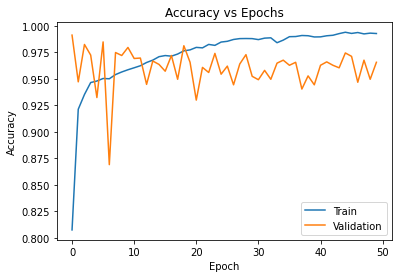

In [ ]:
# plotting the accuracies

plt.plot(history_model_1.history['accuracy'])
plt.plot(history_model_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observations:**

-  **Model accuracy is above 96% on both training and validation datasets**. **Validation accuracy fluctuates**, and it does not increase with the increase in epochs, and the generalizaiton gap is very small. 
- Validation accuracy curve is not stable.



In [ ]:
#saving model_1 as a h5 file
from tensorflow.keras.models import load_model
model_1.save('model_1.h5')

In [ ]:
#loading the save model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model_1=load_model('model_1.h5')

In [ ]:
#Make prediction on the test data using model_1
test_pred = model_1.predict(test_images)
test_pred = np.argmax(test_pred, axis=-1)

In [ ]:
#Converting each entry to single label from one-hot encoded vector
test_labels = np.argmax(test_labels, axis=-1)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1300
           1       0.95      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



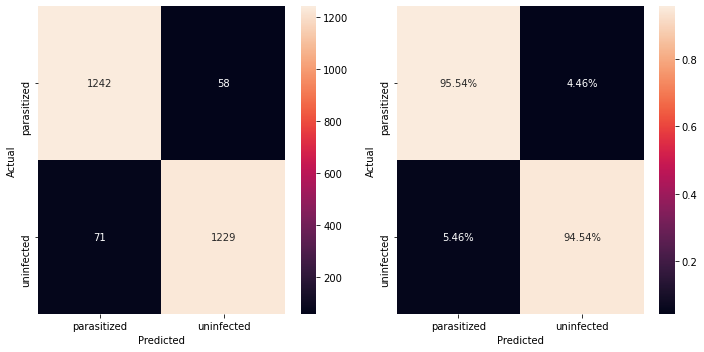

In [ ]:
print(classification_report(test_labels, test_pred))
cm = confusion_matrix(test_labels, test_pred)

plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['parasitized', 'uninfected'], yticklabels=['parasitized', 'uninfected'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

cm = confusion_matrix(test_labels, test_pred)
plt.subplot(1, 2, 2)

sns.heatmap(cm/np.sum(cm, axis =1), annot=True,
            fmt='.2%', xticklabels=['parasitized', 'uninfected'], 
            yticklabels=['parasitized', 'uninfected'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.tight_layout();
plt.show()                          

**Observation :** 


- The model is giving about 95% accuracy on the testing dataset which is comparable to the accuracy of the validation dataset. Hence, the model is giving a generalized performance

- We can see from the above confusion report that both precision and the recall score is 95% (not bad)

- The confusion matrix shows that the model can identify the majoritty of the time (95%) wheather a person is having malaria (parasited) or not having malaria (uninfected)


### **CNNs Model 2 :**

- Experiment by increasing the validation split to 20% (0.2), increasing the second convolutional layer with 64 filters, sigmoid as activation (last dense layer), adamax as an optimizer, and loss = binary_crossentropy to make the model generalize better.

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Define the function
def cnn_model_2():
    model_2= Sequential()
    
    # first conv layer with 32 filters, kernel size 3x3, 
    #and 'relu' as activation function
    model_2.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
                       input_shape=(SIZE, SIZE, 3),
                       activation = 'relu'))

    # max-pooling layer with a pool size of 2x2
    model_2.add(MaxPool2D(pool_size=(2, 2), data_format="channels_last"))

    #adding batch normalization & dropout  
    model_2.add(BatchNormalization(axis = -1))
    model_2.add(Dropout(0.5))

    # second conv layer with 64 filters, kernel size 3x3, 
    #and 'relu' as activation function
    model_2.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same',
                       activation = 'relu' ))

    # max-pooling layer with a pool size of 2x2
    model_2.add(MaxPool2D(pool_size=(2, 2), data_format="channels_last"))

    #adding batch normalization & dropout  
    model_2.add(BatchNormalization(axis = -1))
    model_2.add(Dropout(0.5))

    # flatting the output from the previous layer
    model_2.add(Flatten())

    #adding a dense layer, batch normalization & dropout  
    model_2.add(Dense(activation = 'relu', units=512))
    model_2.add(BatchNormalization())
    model_2.add(Dropout(0.5))
    
    #adding a dense layer, batch normalization & dropout
    model_2.add(Dense(activation = 'relu', units=256))
    model_2.add(BatchNormalization(axis = -1))
    model_2.add(Dropout(0.5))

    #activation function for the final for last dense layer
    model_2.add(Dense(activation = 'sigmoid', units=2))

    #compile the model
    model_2.compile(optimizer = 'adamax',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])
    return model_2

In [ ]:
#Build the 2nd CNN model
model_2 = cnn_model_2()

In [ ]:
#Print the summary of the 1st CNN's model. 
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        2

In [ ]:
history_model_2 = model_2.fit(np.array(train_images), 
                         train_labels, 
                         batch_size = 32, 
                         verbose = 2, 
                         epochs = 62, 
                         validation_split = 0.2,
                         shuffle = True)

Epoch 1/62
624/624 - 5s - loss: 0.6944 - accuracy: 0.6848 - val_loss: 0.0818 - val_accuracy: 0.9728
Epoch 2/62
624/624 - 4s - loss: 0.4382 - accuracy: 0.8218 - val_loss: 0.0399 - val_accuracy: 0.9824
Epoch 3/62
624/624 - 4s - loss: 0.3159 - accuracy: 0.8777 - val_loss: 0.0484 - val_accuracy: 0.9796
Epoch 4/62
624/624 - 4s - loss: 0.2682 - accuracy: 0.8966 - val_loss: 0.0612 - val_accuracy: 0.9728
Epoch 5/62
624/624 - 4s - loss: 0.2404 - accuracy: 0.9107 - val_loss: 0.0929 - val_accuracy: 0.9736
Epoch 6/62
624/624 - 4s - loss: 0.2292 - accuracy: 0.9138 - val_loss: 0.0493 - val_accuracy: 0.9922
Epoch 7/62
624/624 - 4s - loss: 0.2110 - accuracy: 0.9219 - val_loss: 0.1005 - val_accuracy: 0.9770
Epoch 8/62
624/624 - 4s - loss: 0.2031 - accuracy: 0.9255 - val_loss: 0.0547 - val_accuracy: 0.9850
Epoch 9/62
624/624 - 4s - loss: 0.1925 - accuracy: 0.9275 - val_loss: 0.0540 - val_accuracy: 0.9832
Epoch 10/62
624/624 - 4s - loss: 0.1873 - accuracy: 0.9323 - val_loss: 0.0844 - val_accuracy: 0.9790

In [ ]:
tf.keras.callbacks.ModelCheckpoint

tensorflow.python.keras.callbacks.ModelCheckpoint

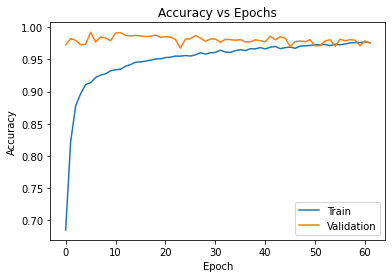

In [ ]:
# plotting the accuracies

plt.plot(history_model_2.history['accuracy'])
plt.plot(history_model_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


**Observation :** 

- Overall, the model is performing better on the training dataset than the validation dataset. Even though the training accuracy decrease, we reduced the overfitting. 

- This model gives a generalized performance with 97.60% on the train and 97.52% on the validation dataset. 

- Even though the training accuracy goes down slightly, the model performance has improved compared to the previous model.

- Around 60 epochs, the model's accuracy on the training and validation dataset is ~ 98%. As we can observe from the plot that the validation accuracy is almost same to the training accuracy. Hence, the model performance has improved and giving a generalized performance.


In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model_2.save('model_2.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model_2=load_model('model_2.h5')

**Predictions on the test data :**

- Let's predict the test set using the second model, print the results using classification report and confusion matrix, and then write the observation from the obtained results.

Let's **convert each entry of test_labels to a single label** to print the classification report and confusion matrix.

In [ ]:
#Make prediction on the test data using model_2 
test_pred = model_2.predict(test_images)

test_pred = np.argmax(test_pred, axis=-1)

In [ ]:
#Converting each entry to single label from one-hot encoded vector
test_labels = np.argmax(test_labels, axis=-1)

let's write the **final observations on the performance of the model on the test data**

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1300
           1       0.96      0.92      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



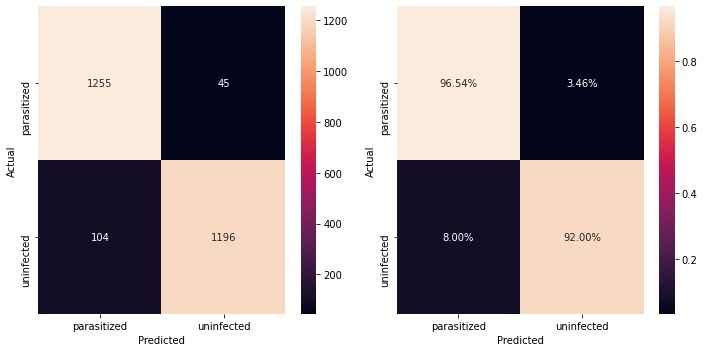

In [ ]:
print(classification_report(test_labels, test_pred))
cm = confusion_matrix(test_labels, test_pred)

plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['parasitized', 'uninfected'], yticklabels=['parasitized', 'uninfected'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

cm = confusion_matrix(test_labels, test_pred)
plt.subplot(1, 2, 2)

sns.heatmap(cm/np.sum(cm, axis =1), annot=True,
            fmt='.2%', xticklabels=['parasitized', 'uninfected'], 
            yticklabels=['parasitized', 'uninfected'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.tight_layout();
plt.show()

**Observations :**

- The model is giving about 94% accuracy on the testing dataset which is comparable to the accuracy of the validation dataset. However, model accuracy goes down from the 95% on the 1st model to 94% on the 2nd model. 

- We can see from the above confusion report that both precision and the recall score is only 92% that is lower than previous model.



### **Hyperparameter Optimization - Keras-Tunner (CNN Model #2) :**

"KerasTuner is an easy-to-use, scalable hyperparameter optimization framework that solves the pain points of hyperparameter search. Easily configure your search space with a define-by-run syntax, then leverage one of the available search algorithms to find the best hyperparameter values for your models. KerasTuner comes with Bayesian Optimization, Hyperband, and Random Search algorithms built-in, and is also designed to be easy for researchers to extend in order to experiment with new search algorithms." - https://keras.io/keras_tuner/

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
pip install -q -U keras-tuner

In [ ]:
pip install keras-tuner

In [ ]:
import keras_tuner as kt


In [ ]:
#Check tensorflow and kerastuner versions
import tensorflow as tf
import kerastuner as kt

print(tf.__version__)
print(kt.__version__)

2.5.0
1.0.3


In [ ]:
#let's import the necessary library 
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.models import Sequential

In [ ]:
#Fixing the seed for random number generators
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)

**Let's prepare a model-building function**

In [ ]:
#Define the function
def model_builder(hp):
  model_2= Sequential()

  model_2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
  model_2.add(MaxPool2D(pool_size = (2, 2), data_format="channels_last"))
  model_2.add(BatchNormalization(axis = -1))
  model_2.add(Dropout(0.2))

  # test 32 and 64 for layer 2
  layers = hp.Int('units', min_value=32, max_value=64, step=32)
  model_2.add(Conv2D(layers, (3, 3), activation = 'relu'))

  model_2.add(MaxPool2D(pool_size = (2, 2), data_format="channels_last"))
  model_2.add(BatchNormalization(axis = -1))
  model_2.add(Dropout(0.2))
  model_2.add(Flatten())

  model_2.add(Dense(activation = 'relu', units=512))
  model_2.add(BatchNormalization())
  model_2.add(Dropout(0.2))

  model_2.add(Dense(activation = 'relu', units=256))
  model_2.add(BatchNormalization(axis = -1))
  model_2.add(Dropout(0.2))

  activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu')
  model_2.add(Dense(activation = activation, units=2))

  #compile the model
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model_2.compile(optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
  return model_2

- **Let's build, Run, and Evaluate Hyperband Tuner :** 

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='Malaria detection')

INFO:tensorflow:Reloading Oracle from existing project my_dir/Malaria detection/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/Malaria detection/tuner0.json


In [ ]:
tf.keras.callbacks.ModelCheckpoint

tensorflow.python.keras.callbacks.ModelCheckpoint

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# train each model 
tuner.search(train_images, train_labels, epochs=50, validation_split=0.1, callbacks=[stop_early])

INFO:tensorflow:Oracle triggered exit


In [ ]:
# show results
tuner.results_summary()

Results summary
Results in my_dir/Malaria detection
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 32
dense_activation: tanh
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 1a9164cefeeda964f1e358897dbc8859
Score: 1.0
Trial summary
Hyperparameters:
units: 32
dense_activation: tanh
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 1.0
Trial summary
Hyperparameters:
units: 32
dense_activation: tanh
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: a779ce9cce00890789a081a9c8bbe49c
Score: 1.0
Trial summary
Hyperparameters:
units: 64
dense_activation: tanh
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 1.0
Trial summary
Hyperparameters:
units: 32
dense_activation: sigmoid
learning_rate: 0.01
tuner/epochs: 4
tuner/initi

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# get the best model
model_best = tuner.get_best_models(num_models=1)

In [ ]:
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 32 and the optimal learning rate for the optimizer
is 0.01.



In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 10 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels,  epochs=10, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/10
624/624 [==============================] - 6s 7ms/step - loss: nan - accuracy: 0.3759 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/10
624/624 [==============================] - 4s 7ms/step - loss: nan - accuracy: 0.3750 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/10
624/624 [==============================] - 4s 7ms/step - loss: nan - accuracy: 0.3750 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/10
624/624 [==============================] - 4s 7ms/step - loss: nan - accuracy: 0.3750 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/10
624/624 [==============================] - 4s 7ms/step - loss: nan - accuracy: 0.3750 - val_loss: nan - val_accuracy: 1.0000
Epoch 6/10
624/624 [==============================] - 4s 7ms/step - loss: nan - accuracy: 0.3750 - val_loss: nan - val_accuracy: 1.0000
Epoch 7/10
624/624 [==============================] - 4s 7ms/step - loss: nan - accuracy: 0.3750 - val_loss: nan - val_accuracy: 1.0000
Epoch 8/10
624/624 [============================

In [ ]:
#Re-instantiate the hypermodel and train it with the optimal number of epochs from above.
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(train_images, train_labels, epochs=best_epoch, validation_split=0.2)

624/624 [==============================] - 6s 7ms/step - loss: nan - accuracy: 0.3984 - val_loss: nan - val_accuracy: 1.0000


In [ ]:
eval_result = hypermodel.evaluate(test_images, test_labels)
print("[test loss, test accuracy]:", eval_result)

82/82 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.5000
[test loss, test accuracy]: [nan, 0.5]


In [ ]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(test_images), test_labels)[1]*100))

82/82 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5000
Test_Accuracy: 50.00%


**Observations:**

- Test Accuracy is only 50%

### **CNNs Model 3 :**

**Image Manipulation :**

- Image manipulation involves the process of manipulating the image with rotation, resizing, and scaling so the model becomes more robust to different images that our dataset doesn't have. We will build the 3rd CNN model now implementing image manipulating by using ImageDataGenerator.

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#image manipulation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20, # let's rotate the image 20 degrees
                               width_shift_range=0.10, # let's shift the pic width by a max of 5%
                               height_shift_range=0.10, # let's shift the pic height by a max of 5%
                               rescale=1/255, # let's rescale the image by normalzing it.
                               shear_range=0.1, # let's shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                               )

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import warnings
warnings.filterwarnings("ignore")

# let's initialize the 3rd CNN model
model_3 = Sequential()

#1st Convolutional layer
model_3.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape =(64, 64, 3)))
model_3.add(MaxPool2D(pool_size=(2, 2)))

#2 - Pooling
# Hidden Layer 1
model_3.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape =(64, 64, 3)))
model_3.add(MaxPool2D(pool_size=(2, 2)))

# Adding a 2nd convolution layer
# relu turns negative values in images to 0
model_3.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape =(64, 64, 3)))
model_3.add(MaxPool2D(pool_size=(2, 2)))

#3 - let's flatten
# converts the matrix in a singe array
model_3.add(Flatten())


model_3.add(Dense(128))
model_3.add(Activation('relu'))


# As dropout help reduce overfitting by randomly turning neurons off during training.
# let's say randomly turn off 50% of neurons.
model_3.add(Dropout(0.5))

#4 - Full Connection
# 128 is the final layer of outputs & from that 1 will be considered.
# Last layer, remember its binary so we use sigmoid
model_3.add(Dense(1))
model_3.add(Activation('sigmoid'))

In [ ]:
#compile the 3rd CNN model
model_3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#model 3 summary
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

**Training CNNs Model 3 :**

In [ ]:
#early stopping 
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
#training the model
batch_size = 16
train_image_gen = image_gen.flow_from_directory('/content/cell_images/train',
                                               target_size=(64, 64),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')
test_image_gen = image_gen.flow_from_directory('/content/cell_images/test',
                                               target_size=(64, 64),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)
train_image_gen.class_indices

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


{'parasitized': 0, 'uninfected': 1}

In [ ]:
history_model_3 = model_3.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 66s 42ms/step - loss: 0.3290 - accuracy: 0.8495 - val_loss: 0.2423 - val_accuracy: 0.9131
Epoch 2/20
1560/1560 [==============================] - 64s 41ms/step - loss: 0.1737 - accuracy: 0.9461 - val_loss: 0.1687 - val_accuracy: 0.9473
Epoch 3/20
1560/1560 [==============================] - 64s 41ms/step - loss: 0.1628 - accuracy: 0.9496 - val_loss: 0.2064 - val_accuracy: 0.9281
Epoch 4/20
1560/1560 [==============================] - 63s 41ms/step - loss: 0.1599 - accuracy: 0.9506 - val_loss: 0.1639 - val_accuracy: 0.9458
Epoch 5/20
1560/1560 [==============================] - 63s 40ms/step - loss: 0.1494 - accuracy: 0.9525 - val_loss: 0.1552 - val_accuracy: 0.9500
Epoch 6/20
1560/1560 [==============================] - 63s 40ms/step - loss: 0.1500 - accuracy: 0.9518 - val_loss: 0.1558 - val_accuracy: 0.9496
Epoch 7/20
1560/1560 [==============================] - 66s 43ms/step - loss: 0.1453 - accuracy: 0.9532 - val_loss: 0.1512 -

**Let's plot the validation and training accuracies:**

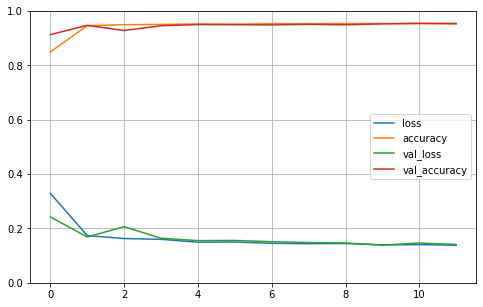

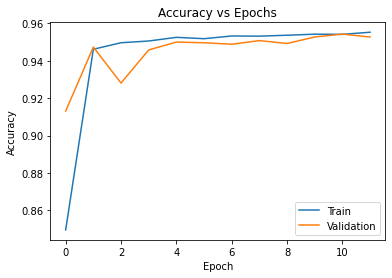

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_model_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical range to [0-1]
plt.show()

# plotting the accuracies

plt.plot(history_model_3.history['accuracy'])
plt.plot(history_model_3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observations:**

- The training accuracy and validation accuracy increases during the training, while the training loss and the validation loss decrease. Morever, the validation curve are closer to training curve, which means that there is not too much overfitting. 

- Training accuracy is 95.52%, and the validation accuracy is 95.27%.  

- Even though **validation and training accuracy goes down slightly** in comparision to the model #2, there is less generalization gap between training and accuracy curve.

- Overall, the model is performing better on the training dataset than the validation dataset. As we can see from the above plot that both both trainig and validation accuracy is at 95%

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model_3.save('model_3.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model_3=load_model('model_3.h5')

**Predictions on the test data (CNN Model 3) :**

- Let's predict the test set using the 3rd model, print the results using classification report and confusion matrix, and then write the observation from the obtained results.

**Final observations on the performance of the model on the test data**

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



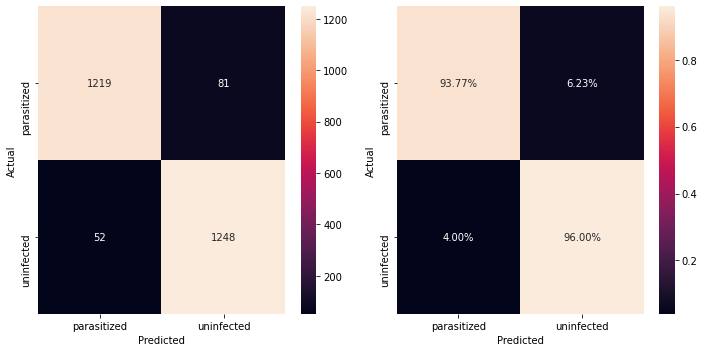

In [ ]:
#printing confusion report and heatmap
from tensorflow.keras.preprocessing import image
pred_probabilities = model_3.predict_generator(test_image_gen)
pred_probabilities
test_image_gen.classes
predictions = pred_probabilities > 0.5
print(classification_report(test_image_gen.classes, predictions))
cm = confusion_matrix(test_image_gen.classes, predictions)

plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['parasitized', 'uninfected'], yticklabels=['parasitized', 'uninfected'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

cm = confusion_matrix(test_image_gen.classes, predictions)
plt.subplot(1, 2, 2)

sns.heatmap(cm/np.sum(cm, axis =1), annot=True,
            fmt='.2%', xticklabels=['parasitized', 'uninfected'], 
            yticklabels=['parasitized', 'uninfected'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.tight_layout();
plt.show()

**Observations :** 

- The overall accuracy of the Model #3 goes up (95%) in comparision to the previous model (model #2) on the testing dataset. Besides, model #3 is performing better and giving higher precision (class 0) and recall score (class)

- Class 0 is uninfected (healthy cell image), and class 1 is parasitized (infected malaria cell image). And the precision score (class 0) and recall (class 1) is 96%, which is higher than the previous model.

### **CNN Model 4 - Transfer Learning (VGG19) :**

**Transfer learning** is a popular deep learning technique that **reuses a pre-trained model on a new problem**. **It can train deep neural networks with comparatively little data.** This is very useful in the data science field since most real-world problems typically do not have millions of labeled data points to train complex models.

Let's begin by clearing the backend and fixing the seed.

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()


In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


**Let's print the new image shape :**

In [ ]:
# New shape 

print('Training set:', train_images.shape, train_labels.shape)
print('Testing set:', test_images.shape, test_labels.shape)

Training set: (24958, 224, 224, 3) (24958, 2)
Testing set: (2600, 224, 224, 3) (2600, 2)


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:
train_dir = '/content/cell_images/train'
test_dir = '/content/cell_images/test'

**VGG19 Model (Transfer Learning) :**

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
 # our layers 
x = Flatten()(vgg.output)

In [ ]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(os.listdir(train_dir)), activation='softmax')(x)

#Initializing the model
model_4 = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model_4.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**Creating new CNNs model :**

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

### Create Model from scratch using CNN
model_4=Sequential()
model_4.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model_4.add(MaxPooling2D(pool_size=2))
model_4.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model_4.add(MaxPooling2D(pool_size=2))
model_4.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model_4.add(MaxPooling2D(pool_size=2))
model_4.add(Flatten())
model_4.add(Dense(500,activation="relu"))
model_4.add(Dense(2,activation="softmax"))
model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [ ]:
# let's compile the model
model_4.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [ ]:
train_datagen_2 = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen_2 = ImageDataGenerator(rescale = 1./255)

In [ ]:

train_set_2 = train_datagen_2.flow_from_directory('/content/cell_images/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 24958 images belonging to 2 classes.


In [ ]:

train_set_2

In [ ]:
test_set_2 = test_datagen_2.flow_from_directory('/content/cell_images/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical', shuffle = False)

Found 2600 images belonging to 2 classes.


In [ ]:
# fit the model
history_model_4 = model_4.fit_generator(
  train_set_2,
  validation_data=test_set_2,
  epochs=50,
  steps_per_epoch=len(train_set_2),
  validation_steps=len(test_set_2)
)

Epoch 1/50
780/780 [==============================] - 295s 377ms/step - loss: 0.4286 - accuracy: 0.8033 - val_loss: 0.1845 - val_accuracy: 0.9365
Epoch 2/50
780/780 [==============================] - 292s 375ms/step - loss: 0.1996 - accuracy: 0.9333 - val_loss: 0.2753 - val_accuracy: 0.9192
Epoch 3/50
780/780 [==============================] - 288s 369ms/step - loss: 0.1837 - accuracy: 0.9411 - val_loss: 0.1971 - val_accuracy: 0.9269
Epoch 4/50
780/780 [==============================] - 287s 368ms/step - loss: 0.1729 - accuracy: 0.9461 - val_loss: 0.1941 - val_accuracy: 0.9338
Epoch 5/50
780/780 [==============================] - 289s 370ms/step - loss: 0.1629 - accuracy: 0.9509 - val_loss: 0.1659 - val_accuracy: 0.9427
Epoch 6/50
780/780 [==============================] - 287s 368ms/step - loss: 0.1499 - accuracy: 0.9546 - val_loss: 0.1989 - val_accuracy: 0.9450
Epoch 7/50
780/780 [==============================] - 273s 350ms/step - loss: 0.1430 - accuracy: 0.9557 - val_loss: 0.1855 -

In [ ]:
tf.keras.callbacks.ModelCheckpoint

tensorflow.python.keras.callbacks.ModelCheckpoint

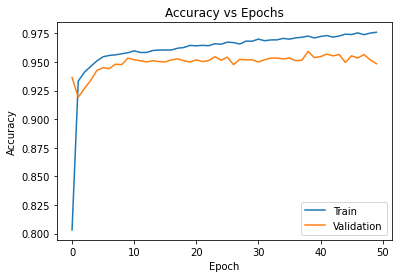

In [ ]:
# plotting the accuracies

plt.plot(history_model_4.history['accuracy'])
plt.plot(history_model_4.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model_4.save('model_4.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model_4=load_model('model_4.h5')

In [ ]:
#Make prediction on the test data using model_4
test_pred = model_4.predict(test_set_2)

test_pred = np.argmax(test_pred, axis=-1)

[[1.0000000e+00 1.0273716e-16]
 [9.9999678e-01 3.1851980e-06]
 [9.9901092e-01 9.8903675e-04]
 ...
 [1.5975328e-04 9.9984026e-01]
 [2.9558488e-03 9.9704415e-01]
 [4.8460209e-04 9.9951541e-01]]
[0 0 0 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1300
           1       0.93      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



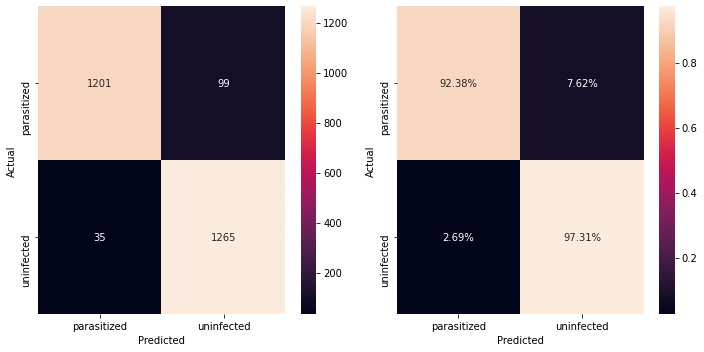

In [ ]:

#printing confusion report and heatmap
from tensorflow.keras.preprocessing import image
pred_probabilities = model_4.predict_generator(test_set_2)
print(pred_probabilities)
print(test_set_2.classes)
predictions = pred_probabilities > 0.5
predictions =np.argmax(predictions, axis=-1)
print(classification_report(test_set_2.classes, predictions))
cm = confusion_matrix(test_set_2.classes, predictions)

plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['parasitized', 'uninfected'], yticklabels=['parasitized', 'uninfected'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

cm = confusion_matrix(test_set_2.classes, predictions)
plt.subplot(1, 2, 2)

sns.heatmap(cm/np.sum(cm, axis =1), annot=True,
            fmt='.2%', xticklabels=['parasitized', 'uninfected'], 
            yticklabels=['parasitized', 'uninfected'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.tight_layout();
plt.show()  

### **Observations/Conclusion:**

- Model # 4 (VGG19) gives best performance on test dataset among all the previous 3 model.
- The CNN model # 4 with VGG19 (transfer learning) gives the same accuracy score as CNN Model #3, i.e., 95%. However, CNN model # 4 with VGG19 (transfer learning) **gives the highest recall and precision score among all the models, i.e., 97.31%, and 97.17% respectively**.Hence, the Model #4 success rate is 97.31% actually to predict a person has malaria, i.e., a person is parasitized.